In [6]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# What this is:
1. Toy example of granger causality test I made from a tutorial
2. Data is macroeconomic data from statsmodel

# Steps I followed:
1. import data
2. identify my X(the thing that granger causes) and Y (the thing that is granger caused) variables 
3. perform an augmented dicky-fuller test for each variable separately to see if the data is stationary
    reference: https://www.analyticsvidhya.com/blog/2021/08/granger-causality-in-time-series-explained-using-chicken-and-egg-problem/
4. if the data is not stationary, I can perform first-order differencing
5. if the data is not stationary after step 4, can't do a GC test on the dataset
6. Do the GC test using the helper function
7. Draw a conclusion

## 1. Import the Data:

In [9]:
# loading the toy dataset from statsmodel library
data = sm.datasets.macrodata.load_pandas()

In [10]:
# defining y-axis as percentage change over time 

data = data.data[['realgdp', 'realcons']].pct_change().dropna() 

# note to self: grangercausalitytests library cannot handle null values

In [12]:
# take a look at the dataset before we plot it
data.head()

,realgdp,realcons
1,0.025256,0.015404
2,-0.001192,0.010440
3,0.003501,0.001085
4,0.022438,0.009580
5,-0.004674,0.012652


<AxesSubplot:xlabel='some time variable (days?)', ylabel='% change over time'>

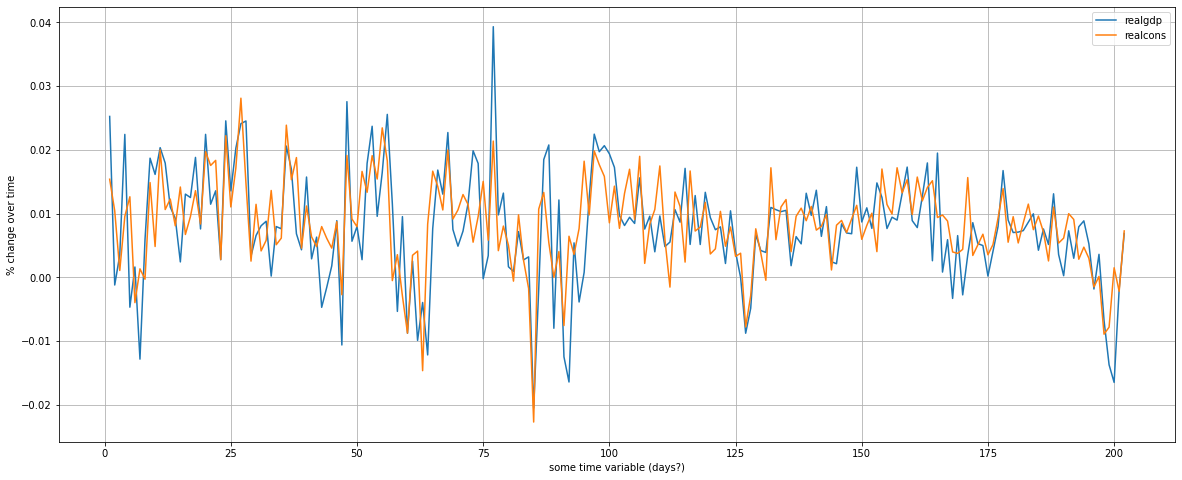

In [11]:
# plotting the dataset
data.plot(figsize=(20, 8), xlabel='some time variable (days?)', ylabel='% change over time', grid=True)

## 2. Identify my X(the thing that granger causes) and Y (the thing that is granger caused) variables:

- X = percentage change over time of real consumer demand
- Y = percentage change over time of real GDP

## 3. ADF test to check if the data is stationary:

In [13]:
data.describe()

,realgdp,realcons
count,202.000000,202.000000
mean,0.007827,0.008427
std,0.008859,0.006988
min,-0.020495,-0.022694
25%,0.003350,0.004419
50%,0.007681,0.008561
75%,0.012812,0.012913
max,0.039340,0.028121


In [14]:
# check if my Y is stationary

result = adfuller(data['realgdp'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')

if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -6.983752175729601
p-value: 8.067243485110358e-10
critical_values: {'1%': -3.463476079125, '5%': -2.876102355, '10%': -2.574532225}
Series is stationary


In [15]:
# check if my X is stationary

result = adfuller(data['realcons'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')

if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -4.987527677731761
p-value: 2.3489727545143988e-05
critical_values: {'1%': -3.4636447617687436, '5%': -2.8761761179270766, '10%': -2.57457158581854}
Series is stationary


## Steps 4 and 5 are NA

## 6. Do the GC test using the helper function

In [16]:
# syntax: grangercausalitytests(your data as a 2D array, max lag you want to go back for - in this case, we are going back to t-4 -> maximum)
grangercausalitytests(data, 4, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=28.7248 , p=0.0000  , df_denom=198, df_num=1
ssr based chi2 test:   chi2=29.1600 , p=0.0000  , df=1
likelihood ratio test: chi2=27.2295 , p=0.0000  , df=1
parameter F test:         F=28.7248 , p=0.0000  , df_denom=198, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=18.9880 , p=0.0000  , df_denom=195, df_num=2
ssr based chi2 test:   chi2=38.9498 , p=0.0000  , df=2
likelihood ratio test: chi2=35.5873 , p=0.0000  , df=2
parameter F test:         F=18.9880 , p=0.0000  , df_denom=195, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=13.5015 , p=0.0000  , df_denom=192, df_num=3
ssr based chi2 test:   chi2=41.9812 , p=0.0000  , df=3
likelihood ratio test: chi2=38.0914 , p=0.0000  , df=3
parameter F test:         F=13.5015 , p=0.0000  , df_denom=192, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=10.9646 , p=0.0000  

{1: ({'ssr_ftest': (28.724803414849244, 2.3081455830242645e-07, 198.0, 1),
   'ssr_chi2test': (29.16002770901363, 6.663994390982149e-08, 1),
   'lrtest': (27.229456246460586, 1.8068480152069365e-07, 1),
   'params_ftest': (28.72480341484925, 2.3081455830242645e-07, 198.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (18.988046084107502, 2.9209045472773863e-08, 195.0, 2),
   'ssr_chi2test': (38.94983812124616, 3.48457740703029e-09, 2),
   'lrtest': (35.587256203442394, 1.8720847364547857e-08, 2),
   'params_ftest': (18.988046084107467, 2.9209045472774998e-08, 195.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (13.501476217751746, 4.961196622274178e-08, 192.0, 3),
   'ssr_chi2test': (41.98115261457184, 4.04924604850433e-09, 3),
   'lrtest': (38.091366257052414, 2.7033433661640424e-08, 3),
   'params_ftest': (13.50147621775175, 4.961196622274178e-08, 192.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 

## 7. Draw a Conclusion:
- P values are < 0.05 for all 4 time lags so we can conclude that:
    - change in real consumer demand granger causes change in real GDP for up to 4 time lags 